## load preprocessed the data

In [1]:
import pickle
import pandas as pd
pd.set_option('display.max_rows', None)
with open("20220428_final_combined_NFL_data.pkl", "rb") as f:
    final_combined_data = pickle.load(f)
    
    
print(f"The preprocessed data shape is {final_combined_data.shape}, header is \n")

final_combined_data.head().T

The preprocessed data shape is (114827, 1434), header is 



,0,1,2,3,4
Offense_0,82.0,82.0,82.0,82.0,82.0
Offense_1,80.0,80.0,80.0,80.0,80.0
Offense_2,87.0,87.0,87.0,87.0,87.0
Offense_3,76.0,76.0,76.0,76.0,76.0
Offense_4,81.0,81.0,81.0,81.0,81.0
Offense_5,80.0,80.0,80.0,80.0,80.0
Offense_6,86.0,86.0,86.0,86.0,86.0
Offense_7,69.0,69.0,69.0,69.0,69.0
Offense_8,29.0,29.0,29.0,29.0,29.0
Offense_9,22.0,22.0,22.0,22.0,22.0


In [6]:
import bz2
import pickle
import _pickle as cPickle

In [9]:
final_combined_data = final_combined_data.reset_index(drop=True)
#with bz2.BZ2File("20220428_final_combined_NFL_data" + ".pbz2", "wb") as f:
#with open("20220428_final_combined_NFL_data.pkl", "wb") as f:
    cPickle.dump(final_combined_data, f)
print("Finished!")   


Finished!


In [10]:
#with bz2.BZ2File("20220428_final_combined_NFL_data" + ".pbz2", "rb") as f:
#with open("20220428_final_combined_NFL_data.pkl", "wb") as f:
    new_data = cPickle.load(f)
print("Finished")

Finished


In [16]:
#load the model

'1.1.2'

In [12]:
new_data.shape

(114827, 1434)

In [13]:
final_combined_data.shape

(114827, 1434)

In [2]:
final_combined_data.SeasonYear.unique()

array([2018, 2019, 2020, 2021])

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay



from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_validate

In [6]:
#load the model currently saved in pkl
with open("050122_linear_non_linear_model_trained.pkl", "rb") as f:
    mixed_best = pickle.load(f)
print("Finished!")

Finished!


In [11]:
#load model using dill recurse=True
#!pip install dill
import dill

with open("050122_linear_non_linear_model_trained_drill.pkl", "wb") as f:
    dill.dump(mixed_best, f, recurse=True)
    
print("Finished")

You should consider upgrading via the '/root/anaconda3/bin/python -m pip install --upgrade pip' command.
Finished


In [14]:
with open("050122_linear_non_linear_model_trained_dill.pkl", "rb") as f:
    new_mixed_best = dill.load(f)
    
print("Finished")

Finished


### split train and test data first, then remove unwanted columns

In [3]:
#split train and test data

#X = final_res.drop(columns=["SeriesFirstDown", "GameId", 'level_1', "GameDate"])
#y = final_res.SeriesFirstDown.tolist()

X = final_combined_data.drop(columns=["Yards_vs_ToGo"], axis=1)

y = final_combined_data.Yards_vs_ToGo.tolist()

split_ratio = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=42)


print(f"X_train shape is {X_train.shape}")
print(f"X_test shape is {X_test.shape}")

print(f"y_train shape is {pd.DataFrame(y_train).shape}")
print(f"y_test shape is {pd.DataFrame(y_test).shape}")

X_train shape is (91861, 1433)
X_test shape is (22966, 1433)
y_train shape is (91861, 1)
y_test shape is (22966, 1)


### Remove unwanted columns in both train and test data
#### Drop columns: "SeriesFirstDown", "GameId", "GameDate", "ToGo", "Yards", "Description", "SeasonYear", 
#### Formation, OffenseTeam, DefenseTeam, Quarter, Minute, Second

In [6]:
X_train_final = X_train.drop(columns=["SeriesFirstDown", "GameId", "GameDate", 
                                     "ToGo", "Yards", "Description", "SeasonYear",
                                      "Formation", "OffenseTeam", "DefenseTeam", "Quarter", "Minute", "Second"
                                     ], axis=1)

X_test_final = X_test.drop(columns=["SeriesFirstDown", "GameId", "GameDate", 
                                     "ToGo", "Yards", "Description", "SeasonYear",
                                      "Formation", "OffenseTeam", "DefenseTeam", "Quarter", "Minute", "Second"
                                     ], axis=1)

print(f"X_train shape is {X_train_final.shape}")
print(f"X_test shape is {X_test_final.shape}")

print(f"y_train shape is {pd.DataFrame(y_train).shape}")
print(f"y_test shape is {pd.DataFrame(y_test).shape}")


X_train shape is (91861, 1420)
X_test shape is (22966, 1420)
y_train shape is (91861, 1)
y_test shape is (22966, 1)


### Try to fit with ridge first then the residual will be fit using random forest

In [3]:
# Create the linear + non-linear ensemble predictor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_validate


class linear_plus_nonlinear(BaseEstimator, TransformerMixin):
    def __init__(self, alpha=1, max_depth=1, min_samples_leaf=1, n_estimators=100):
        
        self = self
        self.alpha = alpha
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.n_estimators = n_estimators
        
    
    def fit(self, X, y):
        ridge = Ridge(alpha=self.alpha)
        rf = RandomForestRegressor(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf, n_estimators=self.n_estimators)
        self.linear_fit = ridge.fit(X, y)
        residual = y - (self.linear_fit.predict(X))
        #print(f"residual shape is {residual.shape}")
        self.nonlinear_fit = rf.fit(X, residual)
        
        return self
    
    def predict(self, X):
        return self.linear_fit.predict(X) + self.nonlinear_fit.predict(X)
    
    
    '''def score(self, X, y):
        predict_y = self.predict(X)
        return 1 - np.dot(np.array(predict_y - y).T, np.array(predict_y -y)) / np.dot(np.array(y-np.mean(y)).T, np.array(y-np.mean(y)))
    '''
    


In [ ]:
#!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_validate


def my_eval(n_estimators, min_samples_leaf, max_depth, alpha):
    # C: SVC hyper parameter to optimize for.
    model = Pipeline([('scaler', StandardScaler()),
                      ('mix', linear_plus_nonlinear(alpha=alpha, min_samples_leaf=int(min_samples_leaf),
                                                       max_depth=int(max_depth), n_estimators=int(n_estimators)))]) 
    
    cv_score = cross_validate(model, X_train_final, y_train, cv=5, scoring='r2', n_jobs=-1)
    
    return np.mean(cv_score['test_score'])
# Set range of C to optimize for.


param_grid = param_grid = {'alpha': (1e-4, 1e4), 'max_depth': (2, 50), 'min_samples_leaf': (2, 100), 'n_estimators': (10, 500)}

myBO = BayesianOptimization(my_eval, param_grid, verbose = 2,
                                 random_state = 42)

myBO.maximize(n_iter=100, init_points=2)

|   iter    |  target   |   alpha   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.08442  |  3.745e+0 |  47.63    |  73.74    |  303.3    |
|  2        |  0.08104  |  1.56e+03 |  9.488    |  7.692    |  434.4    |
|  3        |  0.07645  |  7.231e+0 |  34.07    |  23.84    |  41.31    |
|  4        |  0.08396  |  4.631e+0 |  30.18    |  58.53    |  489.3    |
|  5        |  0.05708  |  9.999e+0 |  2.06     |  30.28    |  490.8    |
|  6        |  0.08473  |  9.708e+0 |  36.06    |  99.4     |  193.2    |
|  7        |  0.08317  |  4.63e+03 |  30.58    |  45.73    |  480.1    |
|  8        |  0.07554  |  9.527e+0 |  46.95    |  50.13    |  12.93    |
|  9        |  0.08456  |  4.854e+0 |  20.29    |  99.67    |  484.5    |
|  10       |  0.08458  |  3.988e+0 |  32.39    |  83.81    |  412.4    |


In [14]:
mixed_best = linear_plus_nonlinear(alpha=9.708e+0, min_samples_leaf=int(99.4),
                                                       max_depth=int(36.06), n_estimators=int(193.2))
print(mixed_best)

linear_plus_nonlinear(alpha=9.708, max_depth=36, min_samples_leaf=99,
                      n_estimators=193)


In [8]:
#mixed_best.fit(X_train_final, y_train)

y_pred = mixed_best.predict(X_test_final)

In [9]:
r_square = np.dot((np.array(y_pred) - np.mean(y_test)).T, (np.array(y_pred) - np.mean(y_test))) / np.dot((np.array(y_test) - np.mean(y_test)).T, (np.array(y_test) - np.mean(y_test)))

In [10]:
r_square

0.08483766429343653

In [11]:
X_test["Yards_vs_ToGo"] = y_test
X_test["Predicted_Yards_toGO"] = y_pred

In [12]:
X_test.iloc[np.argsort(0-y_pred)].head().T

OffenseTeam,ARI,CAR,DAL,LA,CLE
DefenseTeam,TB,NO,JAX,DEN,NO
Formation,UNDER CENTER,UNDER CENTER,UNDER CENTER,UNDER CENTER,UNDER CENTER
,79146,88615,108744,108799,97690
Offense_0,80.0,92.0,73.0,77.0,81.0
Offense_1,82.0,84.0,82.0,85.0,85.0
Offense_2,89.0,86.0,86.0,88.0,90.0
Offense_3,74.0,70.0,74.0,67.0,72.0
Offense_4,81.0,83.0,79.0,78.0,78.0
Offense_5,77.0,98.0,70.0,70.0,67.0
Offense_6,83.0,97.0,74.0,83.0,83.0


In [15]:
X_test["Predicted_Yards_toGO"].describe()

count    22966.000000
mean         1.054626
std          0.673303
min         -0.147623
25%          0.570218
50%          0.877649
75%          1.383015
max          7.332787
Name: Predicted_Yards_toGO, dtype: float64

In [6]:
#build a mock dataset, and check all possible pass/rush direction and formations

#input criteria:
year = 2021
offenseTeam = "MIA"
defenseTeam = "NYJ"

Quarter = 4
minutes = 10
seconds = 5

Down = 1

Yardline = 98

togo = 2


final_combined_data.OffenseTeam.unique()

array(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL',
       'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LA', 'LAC', 'LV',
       'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SF',
       'TB', 'TEN', 'WAS'], dtype=object)

In [5]:
#argument data based on different PassType and rushdirection

#1) separate constant and variable dataset:

#define function to create all combination of PassType and Rushdirection for each Formation

def list_all_PassType_Rushdirection(formation_df, final_Pass_Rush_combined):
    return_df = pd.concat([formation_df.iloc[0,:]]*final_Pass_Rush_combined.shape[0], axis=1, ignore_index=True).T
    
    return_df.loc[:,final_Pass_Rush_combined.columns.tolist()] = final_Pass_Rush_combined
    
    
    return(return_df)
    
    

'''
May result in bugs as not all teams have games with each other in a season

subset_combined = final_combined_data.loc[np.logical_and(np.logical_and(final_combined_data.OffenseTeam=="MIA", \
                                                         final_combined_data.DefenseTeam=="NYJ"), \
                                                         final_combined_data.SeasonYear==2018)]                                                         

'''

#step 1 get all the data for a given offense team in a season
offense_data = final_combined_data.loc[np.logical_and(final_combined_data.OffenseTeam=="MIA", \
                                                         final_combined_data.SeasonYear==2018)].reset_index(drop=True)
#step 2 get all the data for a given offense team in a season
defense_data = final_combined_data.loc[np.logical_and(final_combined_data.DefenseTeam=="LA", \
                                                      final_combined_data.SeasonYear==2018)].reset_index(drop=True)


#step 3 replace all the defence variables in the offensedata with the columns in the DefenseTeam


offense_data.loc[:, [cname for cname in offense_data.columns if "Defense" in cname]] = \
pd.concat([defense_data.loc[0, [cname for cname in defense_data.columns if "Defense" in cname]]]\
          *offense_data.shape[0], axis=1, ignore_index=True).T


subset_combined = offense_data
                                                      
#print(subset_combined.head().T)                                                      

del(offense_data)

del(defense_data)






subset_combined = subset_combined.reset_index(drop=True)


list_of_unique_formations = subset_combined.Formation.tolist()



list_of_unique_PassType = [x.split("_")[1] for x in subset_combined.columns if "PassType" in x]

list_of_unique_RushDirection = [x.split("_")[1] for x in subset_combined.columns if "RushDirection" in x]



PassType_dummies = pd.get_dummies(list_of_unique_PassType, prefix='PassType')

RushDirection_dummies = pd.get_dummies(list_of_unique_RushDirection , prefix='RushDirection')

empty_RushDirection = pd.DataFrame(np.zeros(shape=(PassType_dummies.shape[0], len(list_of_unique_RushDirection))),
                                  columns=RushDirection_dummies.columns)
empty_PassType = pd.DataFrame(np.zeros(shape=(RushDirection_dummies.shape[0], len(list_of_unique_PassType))),
                                  columns=PassType_dummies.columns)



final_PassType_df = pd.concat([PassType_dummies, empty_RushDirection], axis=1)

final_PassType_df['PlayType_PASS'] = 1
final_PassType_df['PlayType_RUSH'] = 0


final_RushDirection_df = pd.concat([empty_PassType, RushDirection_dummies], axis=1)

final_RushDirection_df ['PlayType_PASS'] = 0
final_RushDirection_df ['PlayType_RUSH'] = 1


final_Pass_Rush_combined = pd.concat([final_PassType_df, final_RushDirection_df], axis=0, ignore_index=True)




subset_combined = subset_combined.groupby(['Formation']).apply(lambda x: list_all_PassType_Rushdirection(x, final_Pass_Rush_combined))

print(subset_combined.shape)


#set(set1.columns) - set(final_combined_data.columns)



(92, 1434)


In [14]:
subset_combined.isna().sum()

Offense_0                       0
Offense_1                       0
Offense_2                       0
Offense_3                       0
Offense_4                       0
Offense_5                       0
Offense_6                       0
Offense_7                       0
Offense_8                       0
Offense_9                       0
Offense_10                      0
Offense_11                      0
Offense_12                      0
Offense_13                      0
Offense_14                      0
Offense_15                      0
Offense_16                      0
Offense_17                      0
Offense_18                      0
Offense_19                      0
Offense_20                      0
Offense_21                      0
Offense_22                      0
Offense_23                      0
Offense_24                      0
Offense_25                      0
Offense_26                      0
Offense_27                      0
Offense_28                      0
Offense_29    

In [8]:
subset_combined["Time_in_seconds"] = Quarter*15*60 - minutes*60 - seconds 

subset_combined["YardLine"] = Yardline


subset_combined["Down"] = Down

In [24]:
all_combination_test = subset_combined.drop(columns=["SeriesFirstDown", "GameId", "GameDate", 
                                     "ToGo", "Yards", "Description", "SeasonYear",
                                      "Formation", "OffenseTeam", "DefenseTeam", "Quarter", "Minute", "Second", "Yards_vs_ToGo"
                                     ], axis=1)


all_combination_test.shape

(92, 1420)

In [25]:
def sigmoid(alpha, x):
    '''
    Define sigmoid function to convert y pred value to probabilities
    '''
    return 1.0 / (1.0 + np.exp(0-alpha*x))


y_pred = mixed_best.predict(all_combination_test)


sigmoid_y_pred = [sigmoid((max(100-Yardline-togo, 0)+50)/100, x - Down/2) for x in y_pred]


all_combination_test["sigmoid_y_pred"] = sigmoid_y_pred


final_res_df = all_combination_test.sort_values(["sigmoid_y_pred"], ascending=False).head()

print(final_res_df)



                    Offense_0 Offense_1 Offense_2 Offense_3 Offense_4  \
Formation                                                               
NO HUDDLE SHOTGUN 3      77.0      82.0      86.0      67.0      83.0   
SHOTGUN           3      77.0      82.0      86.0      67.0      83.0   
UNDER CENTER      3      77.0      82.0      86.0      67.0      83.0   
NO HUDDLE         3      77.0      82.0      86.0      67.0      83.0   
NO HUDDLE SHOTGUN 2      77.0      82.0      86.0      67.0      83.0   

                    Offense_5 Offense_6 Offense_7 Offense_8 Offense_9  ...  \
Formation                                                              ...   
NO HUDDLE SHOTGUN 3      59.0      81.0      73.0      63.0      26.0  ...   
SHOTGUN           3      59.0      81.0      73.0      63.0      26.0  ...   
UNDER CENTER      3      59.0      81.0      73.0      63.0      26.0  ...   
NO HUDDLE         3      59.0      81.0      73.0      63.0      26.0  ...   
NO HUDDLE SHOTGUN 2 

In [22]:
#For each row in the head, translate it into football language with success rate (as sigmoid y pred)

def python_to_football(res_row):
    
    
    formation = ""
    playType = ""
    passType = ""
    rushDirection = ""
    successRate = ""
    
    list_columns = final_res_df.columns.tolist()
    
    assert len(res_row) == len(list_columns)
    
    for i in range(len(res_row)):
        
        if "Formation_" in list_columns[i] and res_row[i] == 1:
            formation = list_columns[i].split("_")[1]
        
        if "PlayType_PASS" in list_columns[i] and res_row[i] == 1:
            playType = "PASS"
        elif "PlayType_RUSH" in list_columns[i] and res_row[i] == 1:
            playType = "RUSH"
        
        if "PassType_" in list_columns[i] and res_row[i] == 1:
            passType = list_columns[i].split("_")[1]
            
        if "RushDirection_" in list_columns[i] and res_row[i] == 1:
            rushDirection = list_columns[i].split("_")[1]
        
        if "sigmoid_" in list_columns[i]:
            successRate = f"{round(res_row[i]*100, 2)}%"
            
            
        
            
    
    if passType != "":
        return(f"{formation} Formation, {playType} Play, {passType}, with {successRate} chance of Success.")
    elif rushDirection != "":
        return(f"{formation} Formation, {playType} Play, {rushDirection}, with {successRate} chance of Success.")



final_res_df.apply(lambda x: python_to_football(x), axis=1).reset_index(drop=True).to_json()



'{"0":"NO HUDDLE SHOTGUN Formation, PASS Play, DEEP MIDDLE, with 65.31% chance of Success.","1":"SHOTGUN Formation, PASS Play, DEEP MIDDLE, with 63.88% chance of Success.","2":"UNDER CENTER Formation, PASS Play, DEEP MIDDLE, with 63.88% chance of Success.","3":"NO HUDDLE Formation, PASS Play, DEEP MIDDLE, with 63.28% chance of Success.","4":"NO HUDDLE SHOTGUN Formation, PASS Play, DEEP LEFT, with 62.08% chance of Success."}'

In [233]:
max(-5, 0)

0

In [53]:
#with open ("050122_linear_non_linear_model_trained.pkl", "wb") as f:
    pickle.dump(mixed_best, f)
    
print("Finished saving the trained model!")

Finished saving the trained model!


In [5]:
with open ("050122_linear_non_linear_model_trained.pkl", "rb") as f:
    mixed_best = pickle.load(f)
    
print("Finished loading the trained model!")

Finished loading the trained model!


### Fit the model with random forest regressor only

In [8]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_validate


def my_eval(n_estimators, min_samples_leaf, max_depth):
    # C: SVC hyper parameter to optimize for.
    model = Pipeline([('scaler', StandardScaler()),
                      ('rf', RandomForestRegressor(min_samples_leaf=int(min_samples_leaf),
                                                       max_depth=int(max_depth), n_estimators=int(n_estimators)))]) 
    
    cv_score = cross_validate(model, X_train_final, y_train, cv=5, scoring='r2', n_jobs=-1)
    
    return np.mean(cv_score['test_score'])
# Set range of C to optimize for.


param_grid = param_grid = {'max_depth': (2, 50), 'min_samples_leaf': (2, 100), 'n_estimators': (10, 500)}

myBO = BayesianOptimization(my_eval, param_grid, verbose = 2,
                                 random_state = 42)

myBO.maximize(n_iter=100, init_points=2)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
|  1        |  0.08222  |  19.98    |  95.17    |  368.7    |
|  2        |  0.06922  |  30.74    |  17.29    |  86.44    |
|  3        |  0.08206  |  18.26    |  95.3     |  371.6    |
|  4        |  0.03497  |  48.27    |  3.371    |  343.9    |
|  5        |  0.08151  |  44.54    |  99.25    |  469.3    |
|  6        |  0.03623  |  2.0      |  31.16    |  500.0    |
|  7        |  0.08189  |  44.73    |  96.33    |  422.0    |
|  8        |  0.0363   |  2.0      |  100.0    |  215.5    |
|  9        |  0.07522  |  50.0     |  100.0    |  10.0     |
|  10       |  0.06821  |  5.789    |  11.91    |  11.01    |
|  11       |  0.03634  |  2.0      |  100.0    |  67.26    |


KeyboardInterrupt: 

In [25]:
#get the best parameters from Logistic regression
print(f"The best setting from grid search is {log_cv.best_params_}")

The best setting from grid search is {'log__C': 0.0031622776601683794, 'log__penalty': 'l1', 'log__solver': 'saga'}


In [26]:

scoring = ['precision_macro', 'recall_macro']
lr_best_cv_results = cross_validate(log_cv.best_estimator_, X_train, y_train, cv=5, scoring=scoring)
print(f"Precision of the cv results is {lr_best_cv_results['test_precision_macro']}")
print(f"Recall of the cv results is {lr_best_cv_results['test_recall_macro']}")

/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Precision of the cv results is [0.8717433  0.86814461 0.87278416 0.87003772 0.87154753]
Recall of the cv results is [0.84631372 0.8450528  0.8472288  0.83972948 0.84406561]


/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [22]:
np.linspace(0.01, 0.99, 5)

array([0.01 , 0.255, 0.5  , 0.745, 0.99 ])

In [45]:
#prediction on test dataset


lr_best = log_cv.best_estimator_

lr_best.fit(X_train, y_train)

y_pred_lr  = lr_best.predict(X_test)

y_pred_lr_prob = lr_best.predict_proba(X_test)


cnf_matrix= confusion_matrix(y_test,y_pred_lr)
print(f"With Elestic Net, the confusion matrix is:\n{cnf_matrix}")
Accuracy_lr=lr_best.score(X_test,y_test)

print(f"The overall accuracy of Elestic Net is {Accuracy_lr}")

With Elestic Net, the confusion matrix is:
[[2751  887]
 [ 415 6414]]
The overall accuracy of Elestic Net is 0.8756090570364001


/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


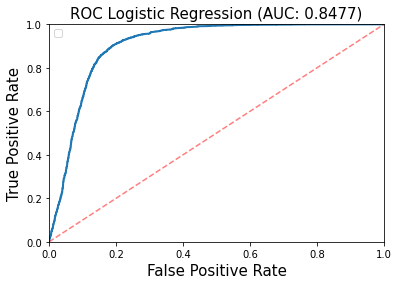

In [93]:
#Plot ROC curve and AUC score

#define function for auc curve
def ROC_plot(lr_best, X_test, y_test, model_name):
    y_pred_lr  = lr_best.predict(X_test)
    

    auc_score = roc_auc_score(y_test, y_pred_lr)

    RocCurveDisplay.from_estimator(lr_best, X_test, y_test, pos_label=1, linewidth=2.0)
    plt.legend('')
    plt.xlabel("False Positive Rate", size=15)
    plt.ylabel("True Positive Rate", size=15)
    plt.title(f"ROC {model_name} (AUC: {round(auc_score, 4)})", size=15)
    plt.plot([0, 1], [0, 1],'r--', alpha=0.5)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    return(plt)


plt = ROC_plot(lr_best, X_test, y_test, "Logistic Regression")
plt.show()

### Method 2: Try SVM classifier (too slow)

In [95]:
from sklearn.svm import SVC
from bayes_opt import BayesianOptimization

def svc_eval(C, gamma):
    svc = Pipeline([('scaler', StandardScaler()), ('svm', SVC(C=C, gamma=gamma, kernel='rbf', random_state=42, verbose=0))])
                       
    
    
    #check on the roc_auc scores
    cv_score = cross_validate(svc, X_train, y_train, cv=5, scoring='f1')
    
    
    return np.mean(cv_score['test_score'])
svcBO = BayesianOptimization(svc_eval, {'C': (0.001,1),
                                                'gamma': (0.01, 1)
                                                })

svcBO.maximize(n_iter=10, init_points=2)

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
|  1        |  0.7877   |  0.2539   |  0.1779   |
|  2        |  0.7877   |  0.5295   |  0.4949   |
|  3        |  0.7877   |  0.1996   |  0.2052   |


KeyboardInterrupt: 

### Method 3: Try Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier
final_pip = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])



param_grid = {'rf__max_depth': [2, 16, 64, 100], \
              'rf__min_samples_leaf': [1,5,10], 'rf__n_estimators': [10,100, 250, 500]}










rf_cv = GridSearchCV(final_pip, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

#ridge_cv = final_pip
rf_cv.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END rf__max_depth=2, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.2s
[CV] END rf__max_depth=2, rf__min_samples_leaf=1, rf__n_estimators=250; total time=   1.9s
[CV] END rf__max_depth=2, rf__min_samples_leaf=1, rf__n_estimators=500; total time=   4.4s
[CV] END rf__max_depth=2, rf__min_samples_leaf=5, rf__n_estimators=250; total time=   2.0s
[CV] END rf__max_depth=2, rf__min_samples_leaf=5, rf__n_estimators=500; total time=   4.5s
[CV] END rf__max_depth=2, rf__min_samples_leaf=10, rf__n_estimators=250; total time=   2.0s
[CV] END rf__max_depth=16, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.7s
[CV] END rf__max_depth=16, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.6s
[CV] END rf__max_depth=16, rf__min_samples_leaf=1, rf__n_estimators=250; total time=  14.7s
[CV] END rf__max_depth=16, rf__min_samples_leaf=1, rf__n_estimators=500; total time=  28.3s
[CV] END rf__max_depth=16,

/root/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END rf__max_depth=2, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   0.8s
[CV] END rf__max_depth=2, rf__min_samples_leaf=1, rf__n_estimators=250; total time=   2.1s
[CV] END rf__max_depth=2, rf__min_samples_leaf=5, rf__n_estimators=10; total time=   0.4s
[CV] END rf__max_depth=2, rf__min_samples_leaf=5, rf__n_estimators=100; total time=   1.0s
[CV] END rf__max_depth=2, rf__min_samples_leaf=5, rf__n_estimators=250; total time=   1.9s
[CV] END rf__max_depth=2, rf__min_samples_leaf=10, rf__n_estimators=10; total time=   0.4s
[CV] END rf__max_depth=2, rf__min_samples_leaf=10, rf__n_estimators=10; total time=   0.3s
[CV] END rf__max_depth=2, rf__min_samples_leaf=10, rf__n_estimators=100; total time=   1.0s
[CV] END rf__max_depth=2, rf__min_samples_leaf=10, rf__n_estimators=500; total time=   5.1s
[CV] END rf__max_depth=16, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   6.6s
[CV] END rf__max_depth=16, rf__min_samples_leaf=1, rf__n_estimators=500; total time=  29

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [2, 16, 64, 100],
                         'rf__min_samples_leaf': [1, 5, 10],
                         'rf__n_estimators': [10, 100, 250, 500]},
             verbose=2)

In [99]:
#prediction on test dataset


rf_best = rf_cv.best_estimator_

rf_best.fit(X_train, y_train)

y_pred_rf  = rf_best.predict(X_test)

y_pred_rf_prob = rf_best.predict_proba(X_test)


cnf_matrix= confusion_matrix(y_test,y_pred_rf)
print(f"With Random Forest Classifer, the confusion matrix is:\n{cnf_matrix}")
Accuracy_rf=rf_best.score(X_test,y_test)

print(f"The overall accuracy of Random Forest Classifier is {Accuracy_rf}")

With Random Forest Classifer, the confusion matrix is:
[[3012  626]
 [ 159 6670]]
The overall accuracy of Random Forest Classifier is 0.9250023884589663


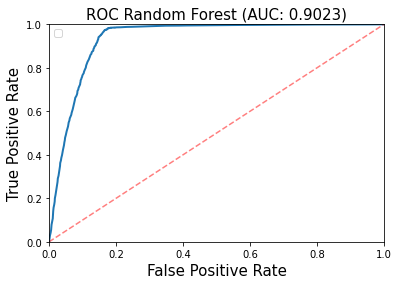

[CV] END rf__max_depth=2, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.2s
[CV] END rf__max_depth=2, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   1.0s
[CV] END rf__max_depth=2, rf__min_samples_leaf=1, rf__n_estimators=500; total time=   4.8s
[CV] END rf__max_depth=2, rf__min_samples_leaf=5, rf__n_estimators=100; total time=   1.4s
[CV] END rf__max_depth=2, rf__min_samples_leaf=5, rf__n_estimators=250; total time=   2.6s
[CV] END rf__max_depth=2, rf__min_samples_leaf=10, rf__n_estimators=10; total time=   0.4s
[CV] END rf__max_depth=2, rf__min_samples_leaf=10, rf__n_estimators=100; total time=   0.9s
[CV] END rf__max_depth=2, rf__min_samples_leaf=10, rf__n_estimators=250; total time=   1.8s
[CV] END rf__max_depth=16, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.9s
[CV] END rf__max_depth=16, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.7s
[CV] END rf__max_depth=16, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   6.

[CV] END rf__max_depth=64, rf__min_samples_leaf=5, rf__n_estimators=500; total time=  43.5s
[CV] END rf__max_depth=64, rf__min_samples_leaf=10, rf__n_estimators=500; total time=  39.8s
[CV] END rf__max_depth=100, rf__min_samples_leaf=1, rf__n_estimators=500; total time=  53.7s
[CV] END rf__max_depth=100, rf__min_samples_leaf=5, rf__n_estimators=250; total time=  22.7s
[CV] END rf__max_depth=100, rf__min_samples_leaf=10, rf__n_estimators=100; total time=   8.4s
[CV] END rf__max_depth=100, rf__min_samples_leaf=10, rf__n_estimators=100; total time=  10.4s
[CV] END rf__max_depth=100, rf__min_samples_leaf=10, rf__n_estimators=250; total time=  21.7s
[CV] END rf__max_depth=100, rf__min_samples_leaf=10, rf__n_estimators=500; total time=  25.9s
[CV] END rf__max_depth=2, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.3s
[CV] END rf__max_depth=2, rf__min_samples_leaf=1, rf__n_estimators=250; total time=   2.4s
[CV] END rf__max_depth=2, rf__min_samples_leaf=5, rf__n_estimators=10; t

In [101]:
#Plot ROC curve and AUC score




plt = ROC_plot(rf_best, X_test, y_test, "Random Forest")
plt.show()

## Method 4: Try XGBoost

In [104]:
from xgboost import XGBClassifier

def xgb_eval(n_estimator, learning_rate, max_depth, min_child_weight, gamma):
    xgb = Pipeline([('std', StandardScaler()), ('xg', XGBClassifier(n_estimators=int(n_estimator), \
                                                              max_depth= int(max_depth), \
                                                              learning_rate=learning_rate,
                        gamma=gamma, min_child_weight=min_child_weight, n_jobs=-1, random_state=42, verbosity=0,
                       use_label_encoder=False, objective="binary:logistic"))])
                       
    
    
    
    cv_score = cross_validate(xgb, X_train, y_train, cv=5)
    
    return np.mean(cv_score['test_score'])
                   
                   
xgbBO = BayesianOptimization(xgb_eval, {'n_estimator': (10, 1000),
                                       'learning_rate': (0.01, 2), 
                                       'min_child_weight': (1,6),
                                       'max_depth': (3,10),
                                       'gamma': (0,0.5)
                                       
                                                })

xgbBO.maximize(n_iter=10, init_points=2)

|   iter    |  target   |   gamma   | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------
|  1        |  0.9008   |  0.1945   |  1.414    |  8.154    |  5.868    |  781.8    |
|  2        |  0.8974   |  0.4816   |  1.472    |  7.243    |  5.127    |  145.5    |
|  3        |  0.9106   |  0.0581   |  0.9683   |  9.321    |  5.206    |  782.8    |
|  4        |  0.9219   |  0.347    |  0.874    |  3.773    |  5.501    |  447.7    |
|  5        |  0.9133   |  0.05998  |  0.9639   |  5.168    |  1.025    |  484.0    |
|  6        |  0.9129   |  0.4403   |  0.9324   |  5.918    |  3.579    |  309.3    |
|  7        |  0.9045   |  0.1287   |  1.373    |  9.255    |  3.826    |  512.3    |
|  8        |  0.925    |  0.4996   |  1.073    |  3.589    |  2.995    |  120.4    |
|  9        |  0.9298   |  0.09919  |  0.04827  |  4.143    |  2.727    |  120.4    |
|  10       |  0.9284   |  0.1846   |  0.3675   |  6.5

In [105]:
#get the best parameters from xgboost regression
print(f"The best setting from Bayesian Optimizer for XGBoost is {xgbBO.max}")

The best setting from Bayesian Optimizer for XGBoost is {'target': 0.9300591668131742, 'params': {'gamma': 0.3257032917312193, 'learning_rate': 0.19327146491643768, 'max_depth': 6.204167296670028, 'min_child_weight': 1.7163111853744009, 'n_estimator': 123.01548548525369}}


In [116]:
xgb_best = Pipeline([('std', StandardScaler()), ('xgb', XGBClassifier(n_estimators=int(xgbBO.max['params']['n_estimator']), \
learning_rate = xgbBO.max['params']['learning_rate'], 
gamma = xgbBO.max['params']['gamma'],
max_depth = int(xgbBO.max['params']['max_depth']),
min_child_weight = xgbBO.max['params']['min_child_weight'], \
                         n_jobs=-1, random_state=42, verbosity=0, \
                         use_label_encoder=False, objective="binary:logistic"))])


                              

With Random Forest Classifer, the confusion matrix is:
[[3036  602]
 [ 117 6712]]
The overall accuracy of XGBoost Classifier is 0.9313079201299321


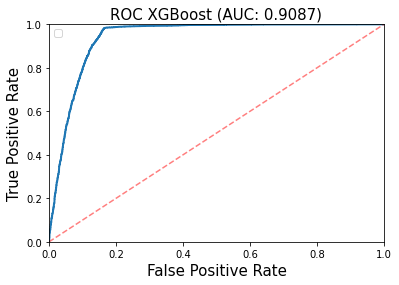

In [117]:
#prediction on test dataset


xgb_best = xgb_best

xgb_best.fit(X_train, y_train)

y_pred_xgb  = xgb_best.predict(X_test)

y_pred_xgb_prob = xgb_best.predict_proba(X_test)


cnf_matrix= confusion_matrix(y_test,y_pred_xgb)
print(f"With Random Forest Classifer, the confusion matrix is:\n{cnf_matrix}")
Accuracy_xgb=xgb_best.score(X_test,y_test)

print(f"The overall accuracy of XGBoost Classifier is {Accuracy_xgb}")


plt = ROC_plot(xgb_best, X_test, y_test, "XGBoost")
plt.show()

## Translate prediction results into "Football" language

In [129]:
import math
def data_translation(X_test, y_test, y_pred_lr_prob, i):
    '''
    Translate row tuple into "Football language"
    Output the true label, predicted probabilty of success and test data inforamtion
    '''
    print(f"Label is {y_test[i]}, predicted probability is {y_pred_lr_prob[i][1]}")
    
    Offense_team = [x for x in X_test.columns if "OffenseTeam" in x and X_test.loc[:,x].tolist()[i]>0][0].split("_")[-1]
    Defense_team = [x for x in X_test.columns if "DefenseTeam" in x and X_test.loc[:,x].tolist()[i]>0][0].split("_")[-1]
    
    #make sure Offense and Defense team show up in the same number of times
    assert X_test.loc[:,f"OffenseTeam_{Offense_team}"].tolist()[i] ==  \
    X_test.loc[:,f"DefenseTeam_{Defense_team}"].tolist()[i]
    
    num_of_plays = X_test.loc[:,f"DefenseTeam_{Defense_team}"].tolist()[i]
    
    Formation = [{x:X_test.loc[:,x].tolist()[i]} for x in X_test.columns if "Formation" in x and X_test.loc[:,x].tolist()[i]>0]
    
    PlayType = [{x:X_test.loc[:,x].tolist()[i]} for x in X_test.columns if "PlayType" in x and X_test.loc[:,x].tolist()[i]>0]
    
    PassType = [{x:X_test.loc[:,x].tolist()[i]} for x in X_test.columns if "PassType" in x and X_test.loc[:,x].tolist()[i]>0]
    
    RushDirection = [{x:X_test.loc[:,x].tolist()[i]} for x in X_test.columns if "RushDirection" in x and X_test.loc[:,x].tolist()[i]>0]
    
    total_sec = X_test.loc[:,"total_sec"].tolist()[i]
    
    sec = f"{math.floor(total_sec/60)}m {total_sec % 60}s"
    
    
    yardline = X_test.loc[:,'YardLine'].tolist()[i]
    
    if yardline > 50:
        ymarker = f"{Defense_team} {100-yardline}"
    else:
        ymarker = f"{Offense_team} {yardline}"
        
    
    return_vec = {"Quarter": X_test.Quarter.tolist()[i],  "Time Left": sec, "YardLine": ymarker, \
                  "Offense_team": Offense_team, "Defense_team": Defense_team, "number of plays": num_of_plays, 
                  "yards gain": X_test.Yards.tolist()[i], "Formation": Formation, "PlayType": PlayType, "PassType": PassType, 
                  "RushDirection": RushDirection}
    
    
    print(return_vec)
    
    return True




### Visualize wrongly classfied results

In [130]:
#print 10 wronlgy classified records
#Looks very suspicious, need to go back to check specific game details

"""
Conclusion on misclassified data: most likely mislabeled:
for example, in the test data [0], index in full data 34760, gameID 2020112601
The penalty on one second down was not labeled, the 3 down were missing labeled as Punt (but actually it was a pass play then get sacked)
The 4th down were mislabeled as PASS play but in fact it is a scored field goal

Proof: youtube game video: https://www.youtube.com/watch?v=ZpJ61jmIi60 @7:00m
ESPN: play by play: https://www.espn.com/nfl/playbyplay?gameid=401220244


Temporarily give up on fixing mislabeled data (040322 WH)

"""

wrong_classfied_ids = [i for i in range(len(y_test)) if y_test[i]!=y_pred_xgb[i]]

for i in wrong_classfied_ids[:10]:
    
    print(f"Here is 10 wrongly classified record {i+1}\n")
    
    data_translation(X_test, y_test, y_pred_xgb_prob, i)

    print("\n")


Here is 10 wrongly classified record 1

Label is 0, predicted probability is 0.9248878359794617
{'Quarter': 3, 'Time Left': '13m 23s', 'YardLine': 'DAL 22', 'Offense_team': 'WAS', 'Defense_team': 'DAL', 'number of plays': 2.0, 'yards gain': 14, 'Formation': [{'Formation_NO HUDDLE SHOTGUN': 1.0}, {'Formation_SHOTGUN': 1.0}], 'PlayType': [{'PlayType_PASS': 1.0}, {'PlayType_RUSH': 1.0}], 'PassType': [{'PassType_SHORT LEFT': 1.0}], 'RushDirection': [{'RushDirection_LEFT END': 1.0}]}


Here is 10 wrongly classified record 8

Label is 1, predicted probability is 0.15021052956581116
{'Quarter': 3, 'Time Left': '6m 55s', 'YardLine': 'NO 22', 'Offense_team': 'TB', 'Defense_team': 'NO', 'number of plays': 2.0, 'yards gain': 8, 'Formation': [{'Formation_SHOTGUN': 1.0}, {'Formation_UNDER CENTER': 1.0}], 'PlayType': [{'PlayType_RUSH': 2.0}], 'PassType': [], 'RushDirection': [{'RushDirection_LEFT END': 1.0}, {'RushDirection_RIGHT GUARD': 1.0}]}


Here is 10 wrongly classified record 33

Label is 0, 

In [123]:
y_pred_xgb_prob

array([[0.07511216, 0.92488784],
       [0.02199852, 0.9780015 ],
       [0.03833121, 0.9616688 ],
       ...,
       [0.04847586, 0.95152414],
       [0.24249357, 0.75750643],
       [0.03304672, 0.9669533 ]], dtype=float32)

In [127]:
X_test.iloc[0,:]


Quarter                          3
YardLine                        78
Yards                           14
OffenseTeam_ARI                0.0
OffenseTeam_ATL                0.0
OffenseTeam_BAL                0.0
OffenseTeam_BUF                0.0
OffenseTeam_CAR                0.0
OffenseTeam_CHI                0.0
OffenseTeam_CIN                0.0
OffenseTeam_CLE                0.0
OffenseTeam_DAL                0.0
OffenseTeam_DEN                0.0
OffenseTeam_DET                0.0
OffenseTeam_GB                 0.0
OffenseTeam_HOU                0.0
OffenseTeam_IND                0.0
OffenseTeam_JAX                0.0
OffenseTeam_KC                 0.0
OffenseTeam_LA                 0.0
OffenseTeam_LAC                0.0
OffenseTeam_LV                 0.0
OffenseTeam_MIA                0.0
OffenseTeam_MIN                0.0
OffenseTeam_NE                 0.0
OffenseTeam_NO                 0.0
OffenseTeam_NYG                0.0
OffenseTeam_NYJ                0.0
OffenseTeam_PHI     

In [128]:
final_res.iloc[34760,:]

GameId                         2020112601
level_1                                37
GameDate                       2020-11-26
Quarter                                 3
YardLine                               78
SeriesFirstDown                         0
Yards                                  14
OffenseTeam_ARI                       0.0
OffenseTeam_ATL                       0.0
OffenseTeam_BAL                       0.0
OffenseTeam_BUF                       0.0
OffenseTeam_CAR                       0.0
OffenseTeam_CHI                       0.0
OffenseTeam_CIN                       0.0
OffenseTeam_CLE                       0.0
OffenseTeam_DAL                       0.0
OffenseTeam_DEN                       0.0
OffenseTeam_DET                       0.0
OffenseTeam_GB                        0.0
OffenseTeam_HOU                       0.0
OffenseTeam_IND                       0.0
OffenseTeam_JAX                       0.0
OffenseTeam_KC                        0.0
OffenseTeam_LA                    